# 准备数据

In [1]:
# 过滤Alphalens的warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# 加载模块
import polars as pl

from vnpy.trader.constant import Interval

from vnpy.alpha import AlphaLab

In [3]:
# 创建数据中心
lab: AlphaLab = AlphaLab("./lab/csi300")

In [4]:
# 设置任务参数
name = "300_lgb"
index_symbol: str = "000300.SSE"
start: str = "2008-01-01"
end: str = "2023-12-31"
interval: Interval = Interval.DAILY
extended_days: int = 100

In [5]:
# 加载所有成分股代码
component_symbols: list[str] = lab.load_component_symbols(index_symbol, start, end)

# 特征计算

In [6]:
# 加载模块
from functools import partial

from vnpy.trader.constant import Interval

from vnpy.alpha.dataset import (
    AlphaDataset,
    process_drop_na,
    process_cs_norm
)
from vnpy.alpha.dataset.datasets.alpha_101 import Alpha101

In [7]:
# 加载成分股数据
df: pl.DataFrame = lab.load_bar_df(component_symbols, interval, start, end, extended_days)

In [8]:
df

shape: (2_668_723, 10)
┌────────────┬──────────┬──────────┬──────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ datetime   ┆ open     ┆ high     ┆ low      ┆ … ┆ turnover   ┆ open_inte ┆ vwap      ┆ vt_symbol │
│ ---        ┆ ---      ┆ ---      ┆ ---      ┆   ┆ ---        ┆ rest      ┆ ---       ┆ ---       │
│ datetime[μ ┆ f64      ┆ f64      ┆ f64      ┆   ┆ f64        ┆ ---       ┆ f64       ┆ str       │
│ s]         ┆          ┆          ┆          ┆   ┆            ┆ f64       ┆           ┆           │
╞════════════╪══════════╪══════════╪══════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 2017-10-24 ┆ 0.833434 ┆ 1.0      ┆ 0.833434 ┆ … ┆ 2.652813e6 ┆ 0.0       ┆ 13.697478 ┆ 601108.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ E         │
│ 2017-10-25 ┆ 1.10006  ┆ 1.10006  ┆ 1.10006  ┆ … ┆ 2.239705e6 ┆ 0.0       ┆ 15.106831 ┆ 601108.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ E         │
│ 2017-10-26 ┆ 1.209886 ┆ 1.209886 ┆ 1.209886 ┆ … ┆ 7.089899e6 ┆ 0.0       ┆ 16.614997 ┆ 601108.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ E         │
│ 2017-10-27 ┆ 1.330692 ┆ 1.330692 ┆ 1.330692 ┆ … ┆ 2.09773727 ┆ 0.0       ┆ 18.273984 ┆ 601108.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ e8         ┆           ┆           ┆ E         │
│ 2017-10-30 ┆ 1.317876 ┆ 1.439906 ┆ 1.273952 ┆ … ┆ 4.2031e9   ┆ 0.0       ┆ 18.61806  ┆ 601108.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ E         │
│ …          ┆ …        ┆ …        ┆ …        ┆ … ┆ …          ┆ …         ┆ …         ┆ …         │
│ 2024-01-04 ┆ 0.726842 ┆ 0.749176 ┆ 0.721259 ┆ … ┆ 6.6511895e ┆ 0.0       ┆ 13.1771   ┆ 603699.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ E         │
│ 2024-01-05 ┆ 0.744611 ┆ 0.746133 ┆ 0.724812 ┆ … ┆ 5.5443402e ┆ 0.0       ┆ 13.133319 ┆ 603699.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ E         │
│ 2024-01-08 ┆ 0.728364 ┆ 0.738009 ┆ 0.711614 ┆ … ┆ 5.9756521e ┆ 0.0       ┆ 12.965438 ┆ 603699.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ E         │
│ 2024-01-09 ┆ 0.714663 ┆ 0.729892 ┆ 0.714154 ┆ … ┆ 4.0378286e ┆ 0.0       ┆ 12.898231 ┆ 603699.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ E         │
│ 2024-01-10 ┆ 0.72329  ┆ 0.731413 ┆ 0.714154 ┆ … ┆ 2.7287782e ┆ 0.0       ┆ 12.913085 ┆ 603699.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 7          ┆           ┆           ┆ E         │
└────────────┴──────────┴──────────┴──────────┴───┴────────────┴───────────┴───────────┴───────────┘

In [9]:
# 创建数据集对象
dataset: AlphaDataset = Alpha101(
    df,
    train_period = ("2008-01-01", "2014-12-31"),
    valid_period = ("2015-01-01", "2016-12-31"),
    test_period = ("2017-01-01", "2020-8-31"),
)

In [10]:
# 添加数据预处理器
dataset.add_processor("learn", partial(process_drop_na, names=["label"]))
dataset.add_processor("learn", partial(process_cs_norm, names=["label"], method="zscore"))

In [11]:
# 收集指数成分过滤器
filters: dict[str, list[str]] = lab.load_component_filters(index_symbol, start, end)

In [12]:
# 准备特征和标签数据
dataset.prepare_data(filters, max_workers=6)

2025-12-24 12:06:36 开始计算表达式因子特征


100%|██████████| 83/83 [1:42:53<00:00, 74.38s/it] 


2025-12-24 13:49:31 开始合并结果数据因子特征


0it [00:00, ?it/s]


2025-12-24 13:49:32 开始筛选成分股数据


100%|██████████| 819/819 [00:05<00:00, 159.46it/s]


factor:
datetime    vt_symbol  
2008-07-21  000001.SZSE    1565.490
            000002.SZSE    1917.970
            000009.SZSE     986.440
            000012.SZSE    1966.680
            000021.SZSE     867.425
                             ...   
2020-08-31  603799.SSE     3081.475
            603833.SSE     3350.785
            603899.SSE     3103.160
            603986.SSE     2475.660
            603993.SSE     1233.165
Name: alpha36, Length: 866349, dtype: float64
prices:
vt_symbol   000001.SZSE  000002.SZSE  000008.SZSE  000009.SZSE  000012.SZSE  \
datetime                                                                      
2008-07-21     0.521913     0.465425          NaN     0.483207     0.633089   
2008-07-22     0.523220     0.458673          NaN     0.495435     0.644347   
2008-07-23     0.518236     0.452434          NaN     0.494487     0.644347   
2008-07-24     0.545792     0.482567          NaN     0.517071     0.654039   
2008-07-25     0.553133     0.475293        

min       max         mean         std  count    count %
factor_quantile                                                               
1                  77.530  1410.255   851.409058  194.580744  87457  10.129630
2                 621.355  1702.670  1150.269736  163.284830  86424  10.009984
3                 819.635  1886.885  1331.312114  178.996241  85810   9.938868
4                 971.790  2080.015  1486.461639  195.009942  86265   9.991568
5                1093.180  2246.535  1633.847141  210.559624  86393  10.006393
6                1220.265  2433.195  1777.169891  225.700599  85707   9.926938
7                1302.670  2648.255  1921.267748  241.211796  85790   9.936552
8                1428.540  2861.445  2074.410315  259.144130  86288   9.994232
9                1536.145  3165.920  2253.240142  282.141159  85948   9.954852
10               1709.050  3907.255  2543.355467  346.559942  87296  10.110983

Returns Analysis


1D     5D    10D
Ann. alpha                                     0.023  0.056  0.041
beta                                          -0.014 -0.026 -0.030
Mean Period Wise Return Top Quantile (bps)     2.428  3.291  2.037
Mean Period Wise Return Bottom Quantile (bps) -0.635 -2.825 -2.082
Mean Period Wise Spread (bps)                  3.063  6.106  4.108

<Figure size 640x480 with 0 Axes>

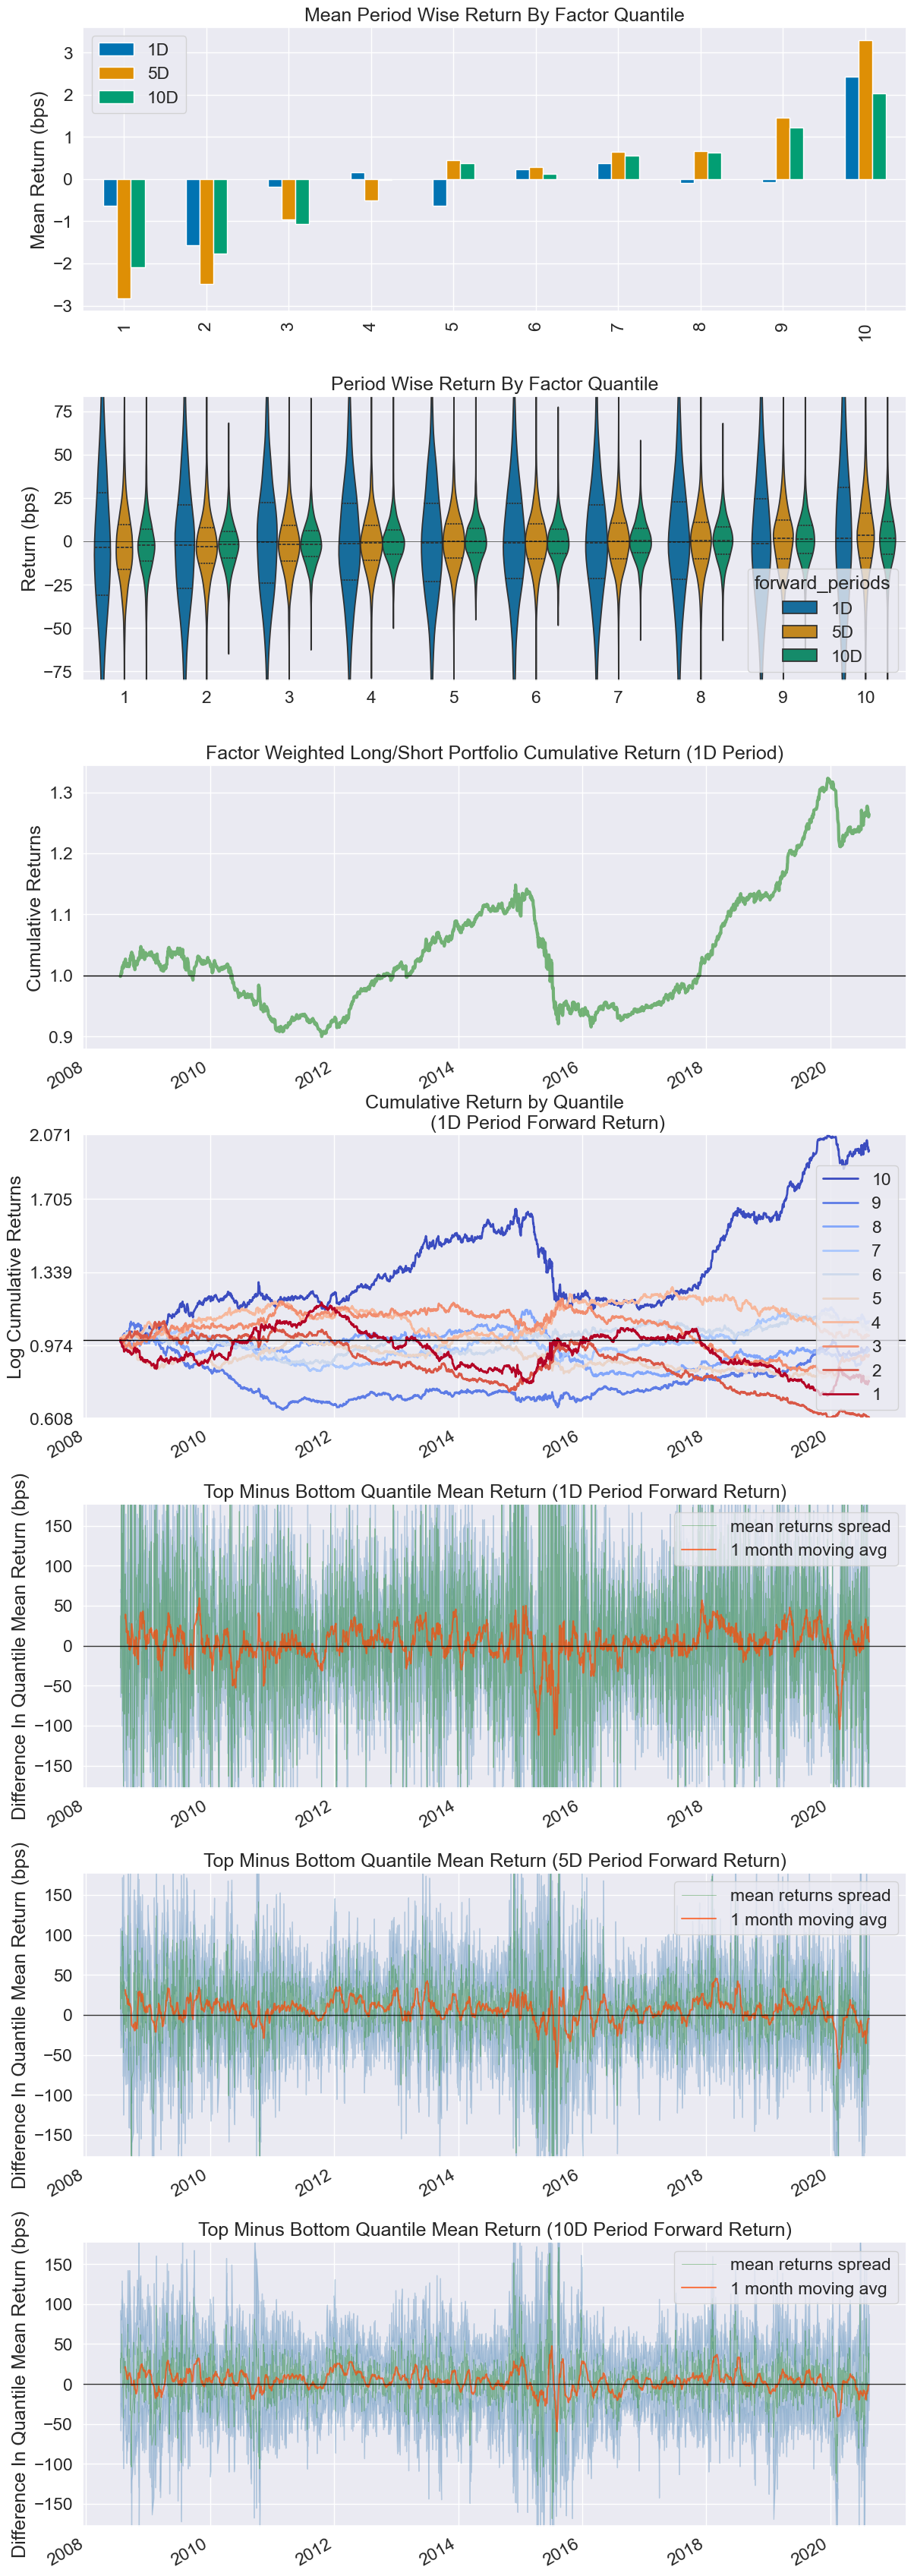

Information Analysis


1D      5D     10D
IC Mean           0.008   0.025   0.024
IC Std.           0.112   0.111   0.112
Risk-Adjusted IC  0.076   0.223   0.216
t-stat(IC)        4.120  12.061  11.703
p-value(IC)       0.000   0.000   0.000
IC Skew          -0.047  -0.234  -0.204
IC Kurtosis       0.713   0.775   0.901

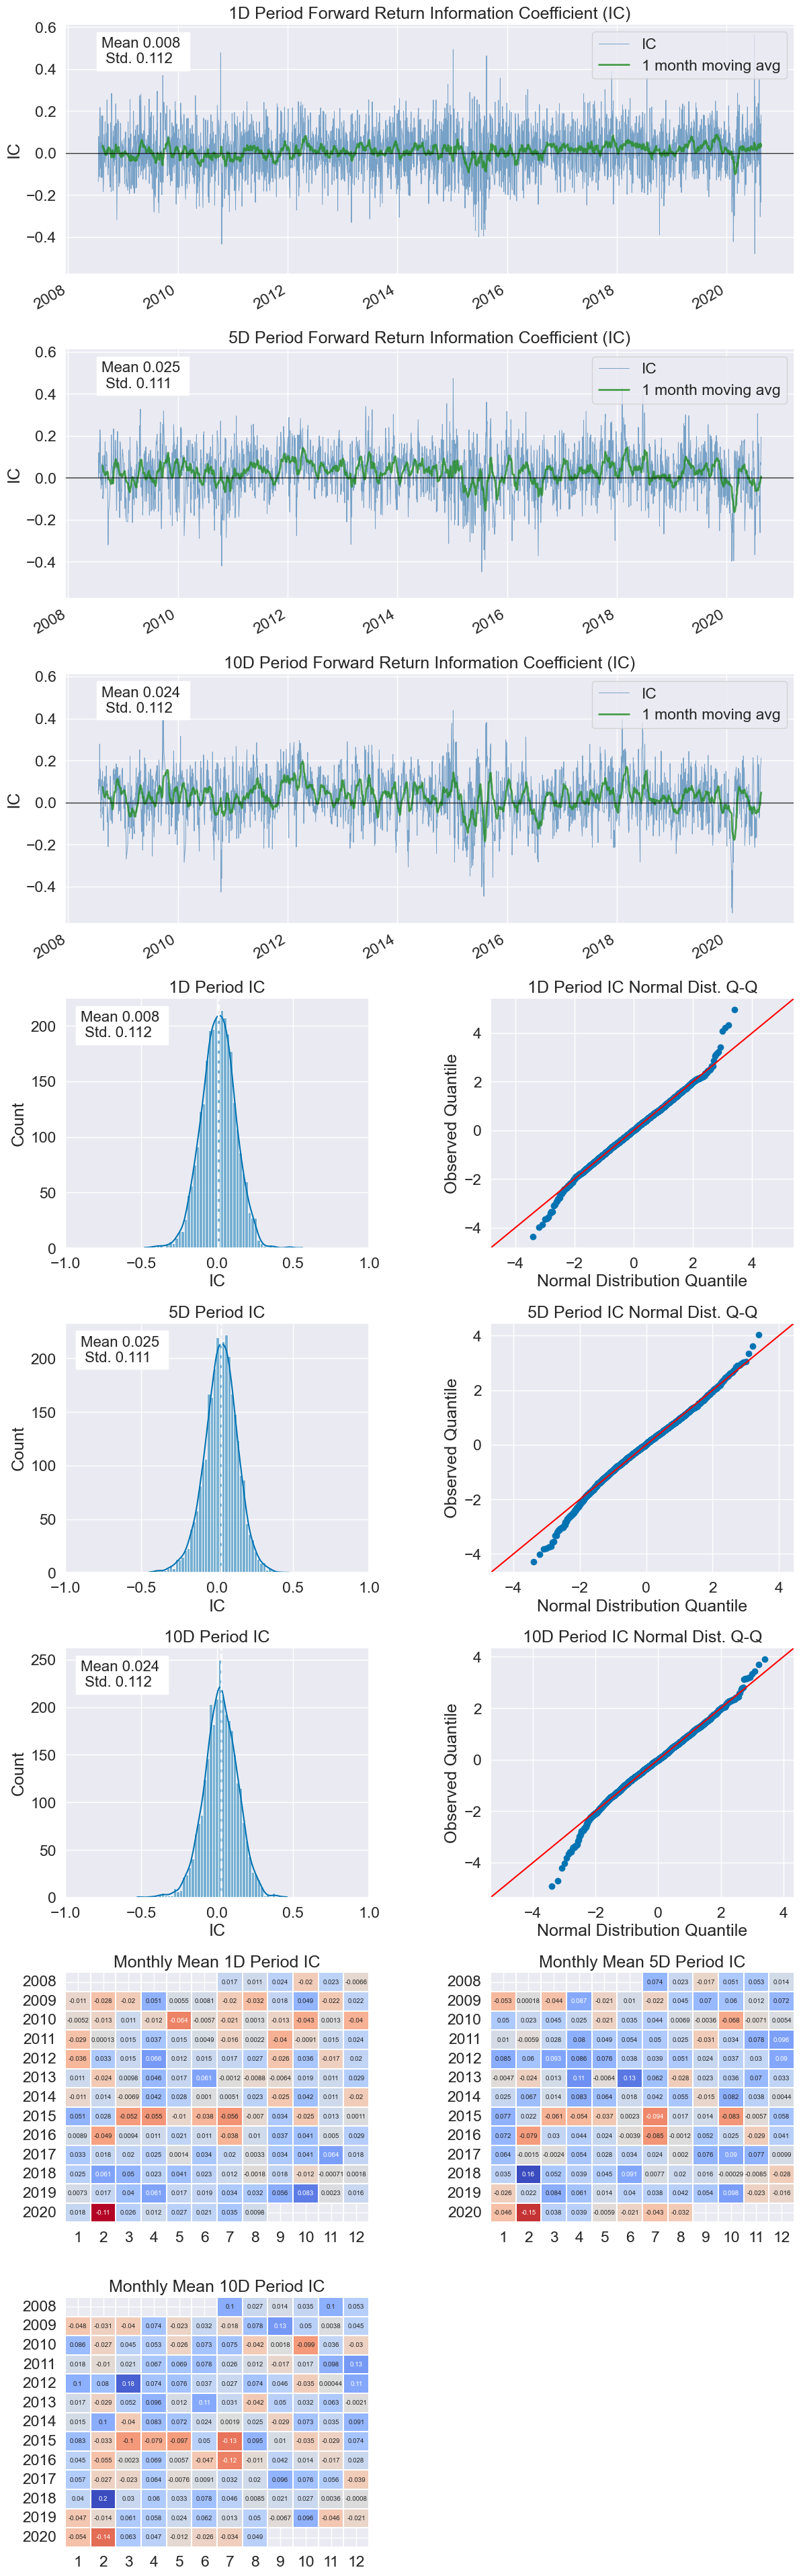

d:\veighna_studio\Lib\site-packages\alphalens\utils.py:932: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover    0.604  0.771  0.849
Quantile 2 Mean Turnover    0.771  0.841  0.876
Quantile 3 Mean Turnover    0.818  0.870  0.889
Quantile 4 Mean Turnover    0.836  0.881  0.895
Quantile 5 Mean Turnover    0.846  0.887  0.898
Quantile 6 Mean Turnover    0.846  0.888  0.897
Quantile 7 Mean Turnover    0.837  0.883  0.894
Quantile 8 Mean Turnover    0.813  0.868  0.887
Quantile 9 Mean Turnover    0.771  0.844  0.875
Quantile 10 Mean Turnover   0.581  0.766  0.838

1D     5D    10D
Mean Factor Rank Autocorrelation  0.683  0.377  0.169

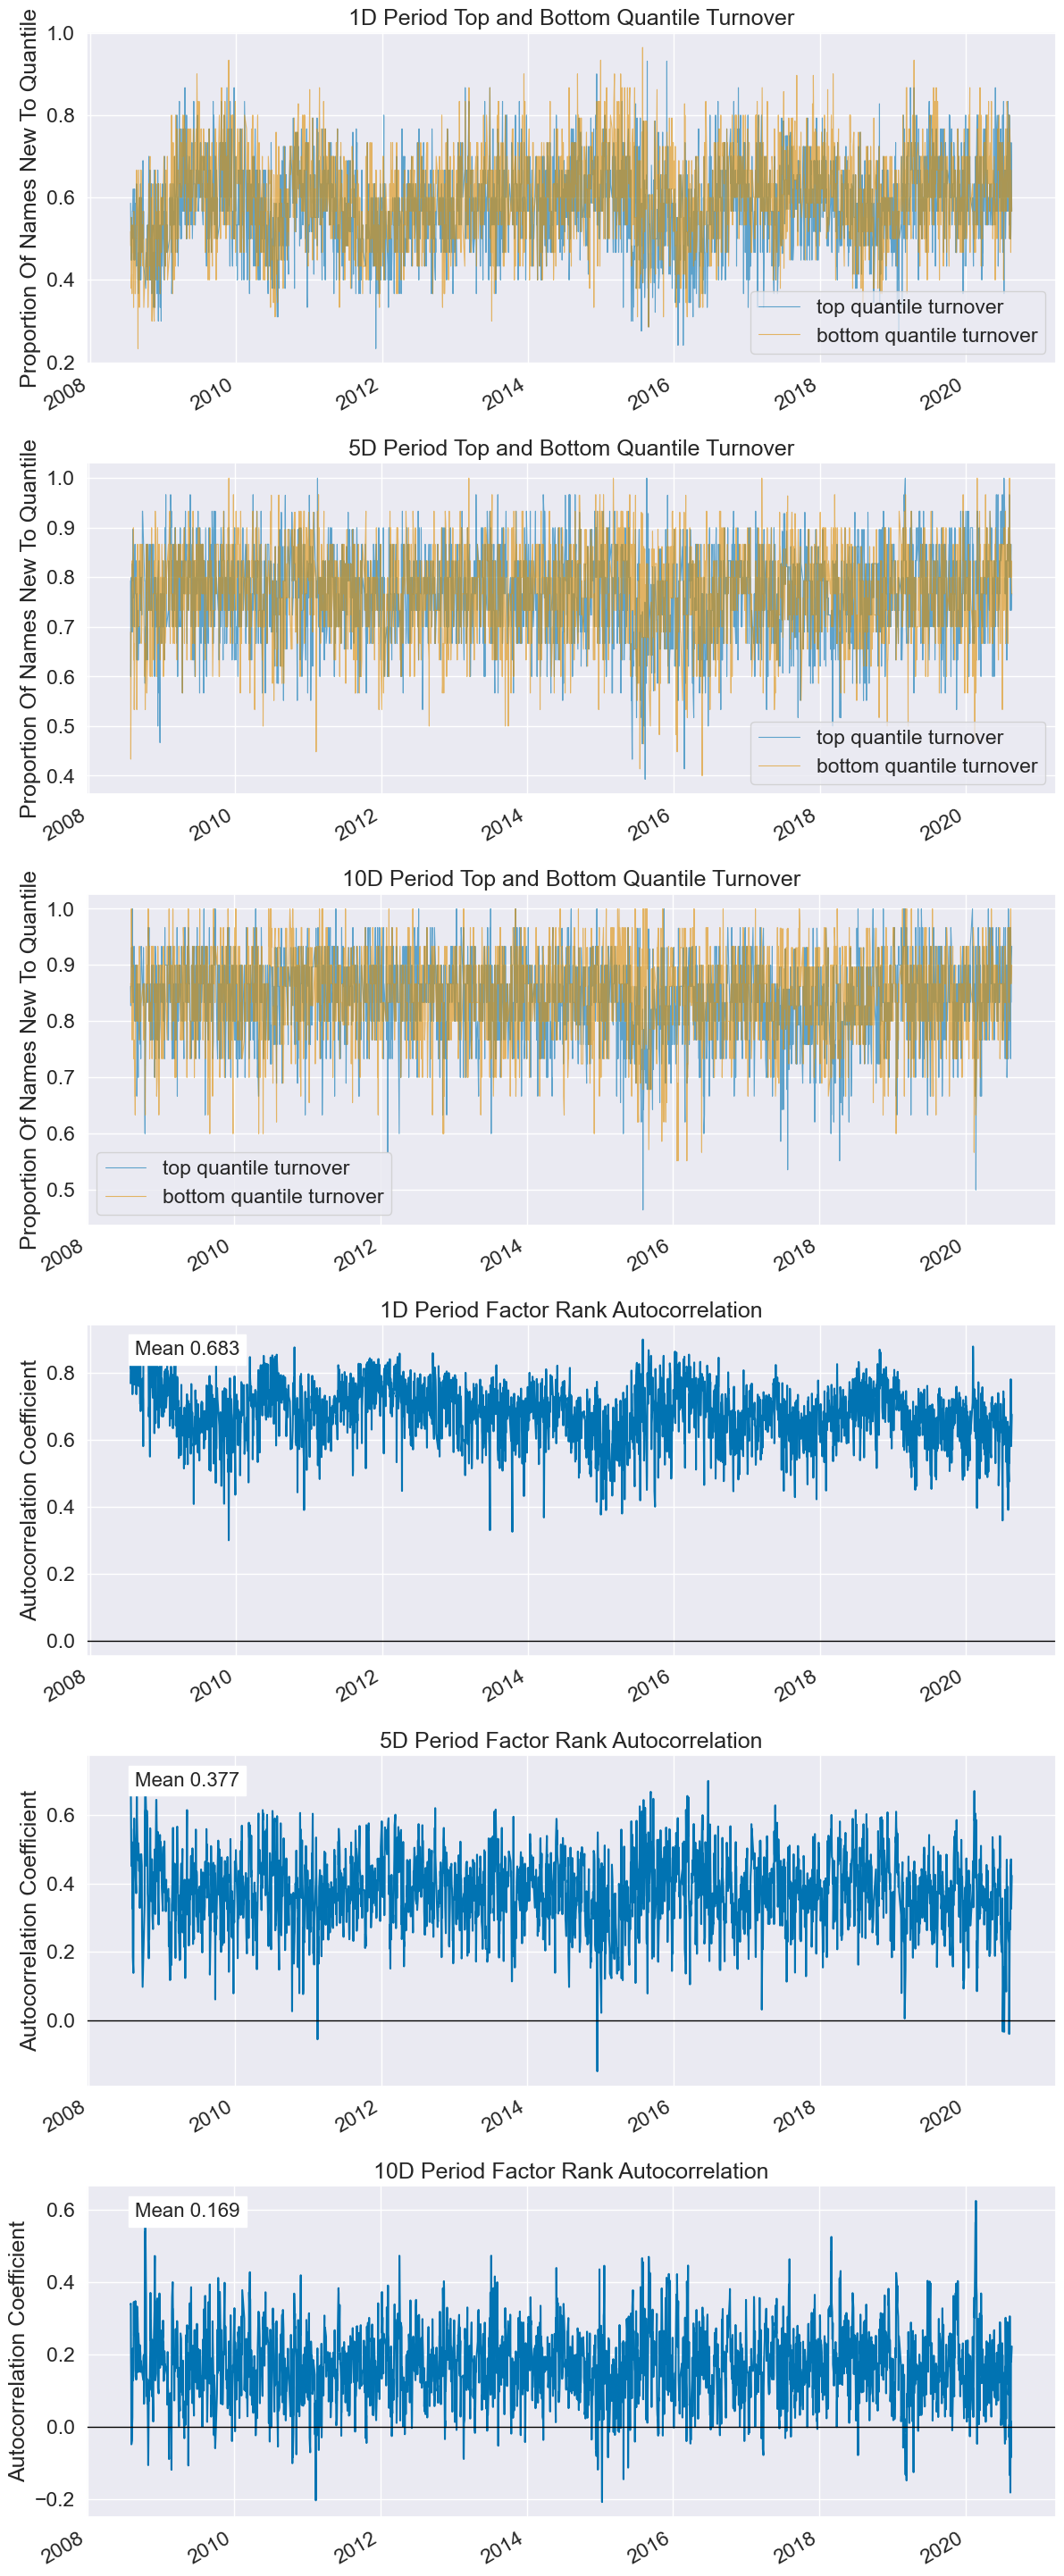

In [13]:
# 特征表现分析
dataset.show_feature_performance("alpha36")

In [14]:
# 数据预处理
dataset.process_data()

In [15]:
# 保存到文件缓存
lab.save_dataset(name, dataset)

# 模型训练

In [16]:
# 加载模块
import numpy as np

from vnpy.alpha import Segment, AlphaDataset, AlphaModel

from vnpy.alpha.model.models.lgb_model import LgbModel

In [17]:
# 从文件缓存加载
dataset: AlphaDataset = lab.load_dataset(name)

In [18]:
# 创建模型对象
model: AlphaModel = LgbModel(seed=42)

In [19]:
# 使用数据集训练模型
model.fit(dataset)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.132957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16074
[LightGBM] [Info] Number of data points in the train set: 510579, number of used features: 79
[LightGBM] [Info] Start training from score -0.000000
[1]	train's l2: 0.995584	valid's l2: 0.996182
Training until validation scores don't improve for 50 rounds
[2]	train's l2: 0.994608	valid's l2: 0.996054
[3]	train's l2: 0.993674	valid's l2: 0.995714
[4]	train's l2: 0.992924	valid's l2: 0.995463
[5]	train's l2: 0.992192	valid's l2: 0.995442
[6]	train's l2: 0.991461	valid's l2: 0.994954
[7]	train's l2: 0.990757	valid's l2: 0.994717
[8]	train's l2: 0.990148	valid's l2: 0.994584
[9]	train's l2: 0.989592	valid's l2: 0.994578
[10]	train's l2: 0.989076	valid's l2: 0.994357
[11]	train's l2: 0.988513	valid's l2: 0.994389
[12]	train's l2: 0.988019	valid's l2: 0.994527
[13]	train's l2: 0.987482	valid's l2: 0

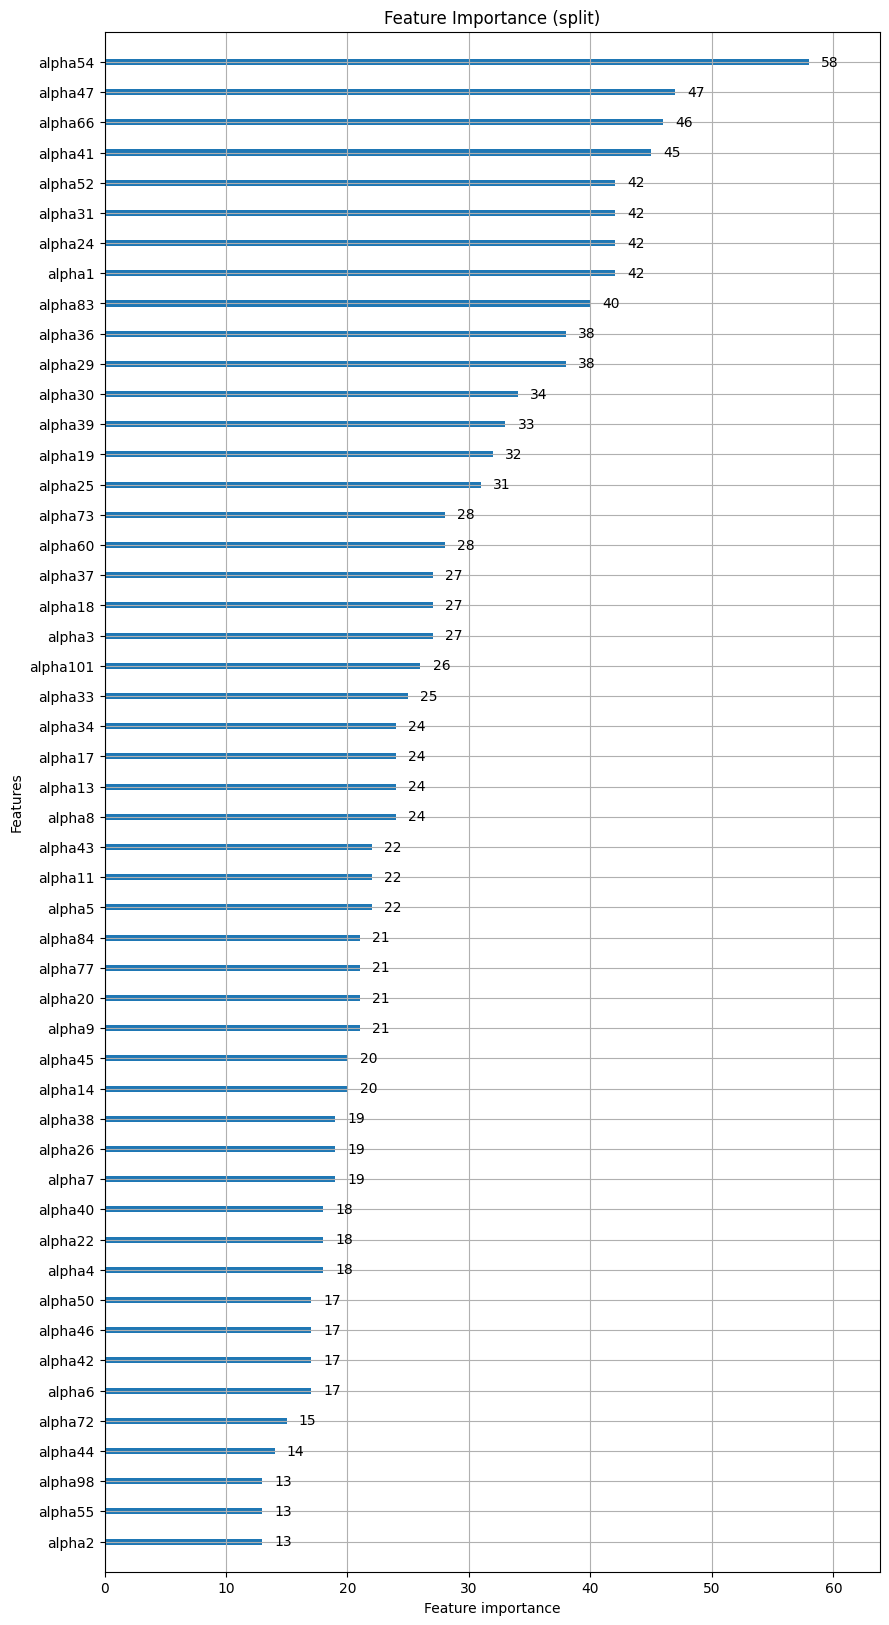

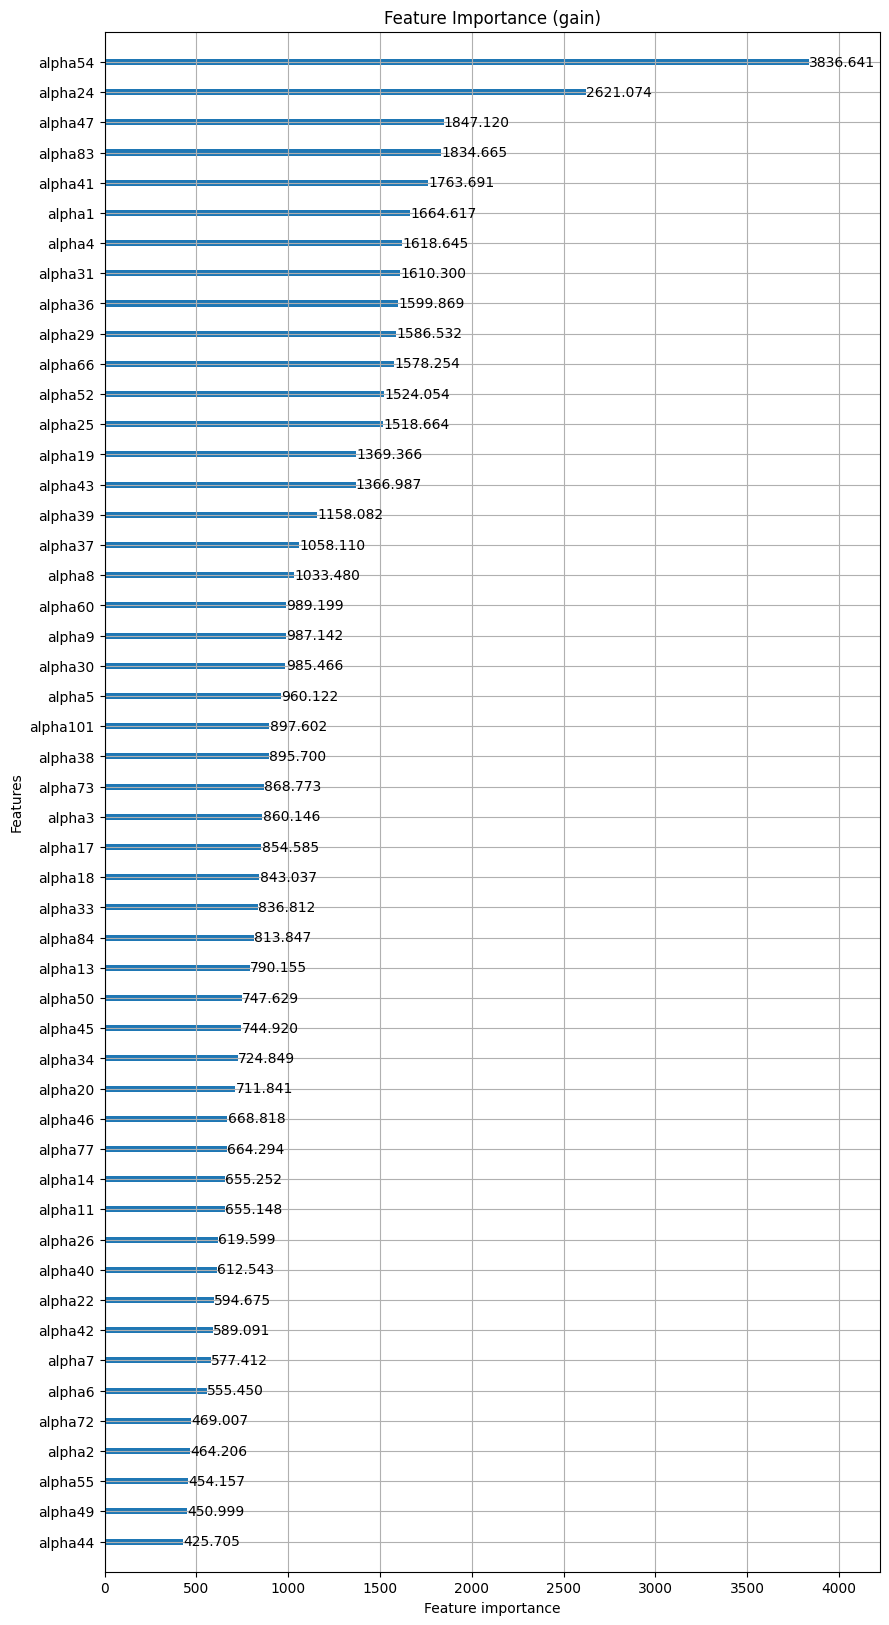

In [20]:
# 查看模型细节
model.detail()

In [21]:
# 保存模型
lab.save_model(name, model)

# 预测信号

In [22]:
model: AlphaModel = lab.load_model(name)

In [23]:
# 用模型在测试集上预测
pre: np.ndarray = model.predict(dataset, Segment.TEST)

# 加载测试集数据
df_t: pl.DataFrame = dataset.fetch_infer(Segment.TEST)

# 合并预测信号列
df_t = df_t.with_columns(pl.Series(pre).alias("signal"))

# 提取信号数据
signal: pl.DataFrame = df_t["datetime", "vt_symbol", "signal"]

factor:
datetime    vt_symbol  
2017-01-03  000001.SZSE   -0.045126
            000002.SZSE    0.004986
            000008.SZSE   -0.055127
            000009.SZSE    0.035334
            000027.SZSE    0.004469
                             ...   
2020-08-31  603799.SSE    -0.021909
            603833.SSE     0.030128
            603899.SSE    -0.099171
            603986.SSE    -0.247434
            603993.SSE     0.050685
Name: signal, Length: 267600, dtype: float64
prices:
vt_symbol   000001.SZSE  000002.SZSE  000008.SZSE  000009.SZSE  000012.SZSE  \
datetime                                                                      
2017-01-03     0.914155     1.296462     7.197271     1.960126     0.900996   
2017-01-04     0.914155     1.303968     7.235848     1.995724     0.912063   
2017-01-05     0.915154     1.308974     7.251215     1.975105     0.916801   
2017-01-06     0.911157     1.290839     7.305159     1.969488     0.899417   
2017-01-09     0.913155     1.292089     7.34

min       max      mean       std  count  count %
factor_quantile                                                        
1               -2.651930 -0.006388 -0.183711  0.102054  26460     10.0
2               -0.584812  0.010768 -0.084899  0.028586  26460     10.0
3               -0.312208  0.032745 -0.048134  0.019736  26460     10.0
4               -0.108315  0.047698 -0.025173  0.016213  26460     10.0
5               -0.074334  0.078232 -0.007463  0.015788  26460     10.0
6               -0.045992  0.113769  0.008757  0.017135  26460     10.0
7               -0.021072  0.147808  0.025959  0.020293  26460     10.0
8               -0.005507  0.212817  0.047740  0.026099  26460     10.0
9                0.010264  0.311239  0.082410  0.037917  26460     10.0
10               0.039095  2.147349  0.184297  0.097227  26460     10.0

Returns Analysis


1D      5D    10D
Ann. alpha                                      0.471   0.243  0.132
beta                                            0.022   0.012 -0.027
Mean Period Wise Return Top Quantile (bps)     15.218   9.721  6.232
Mean Period Wise Return Bottom Quantile (bps) -13.958  -7.836 -3.304
Mean Period Wise Spread (bps)                  29.176  17.594  9.583

<Figure size 640x480 with 0 Axes>

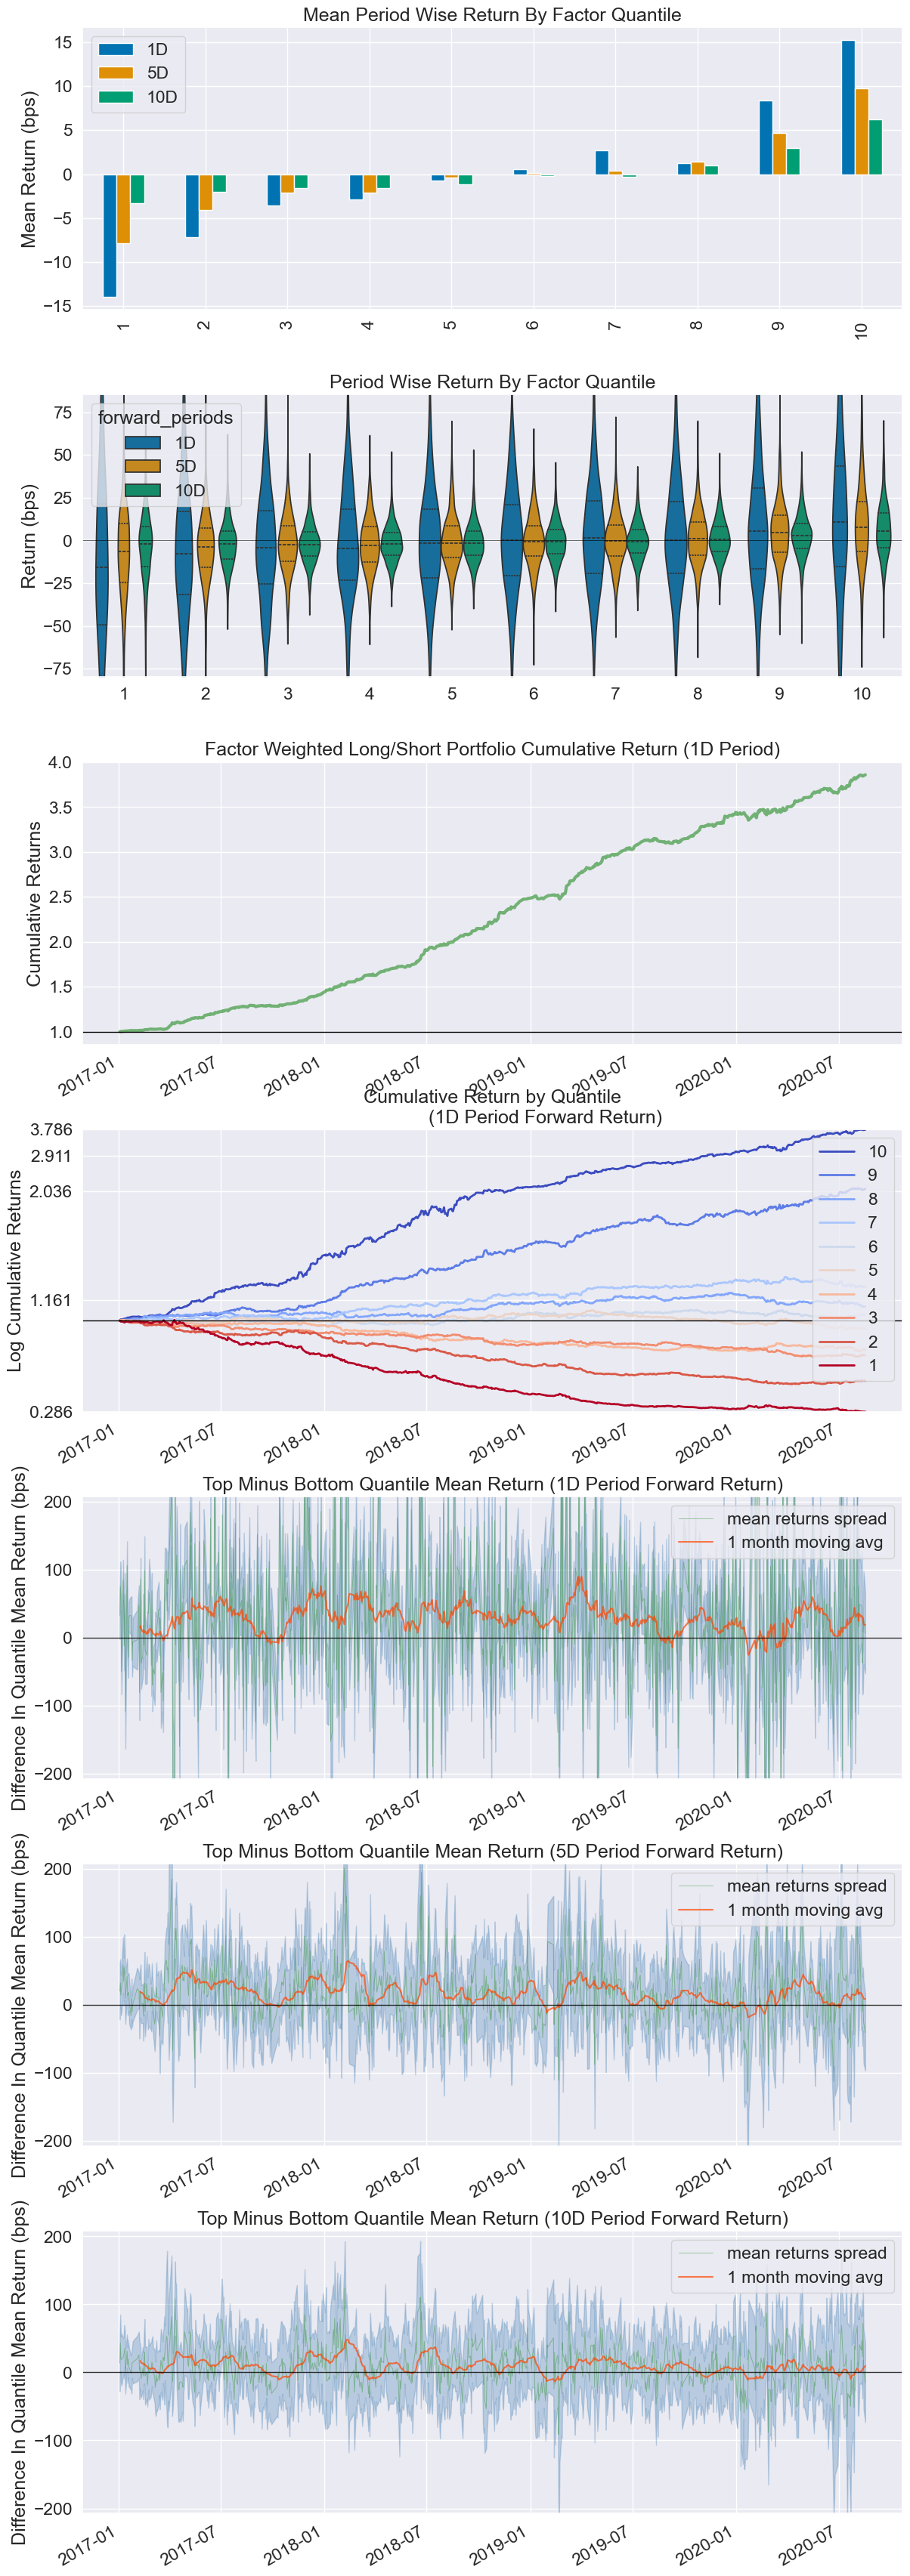

Information Analysis


1D      5D     10D
IC Mean            0.059   0.059   0.048
IC Std.            0.119   0.113   0.112
Risk-Adjusted IC   0.497   0.523   0.431
t-stat(IC)        14.762  15.547  12.803
p-value(IC)        0.000   0.000   0.000
IC Skew            0.136   0.179   0.004
IC Kurtosis        0.257  -0.126  -0.239

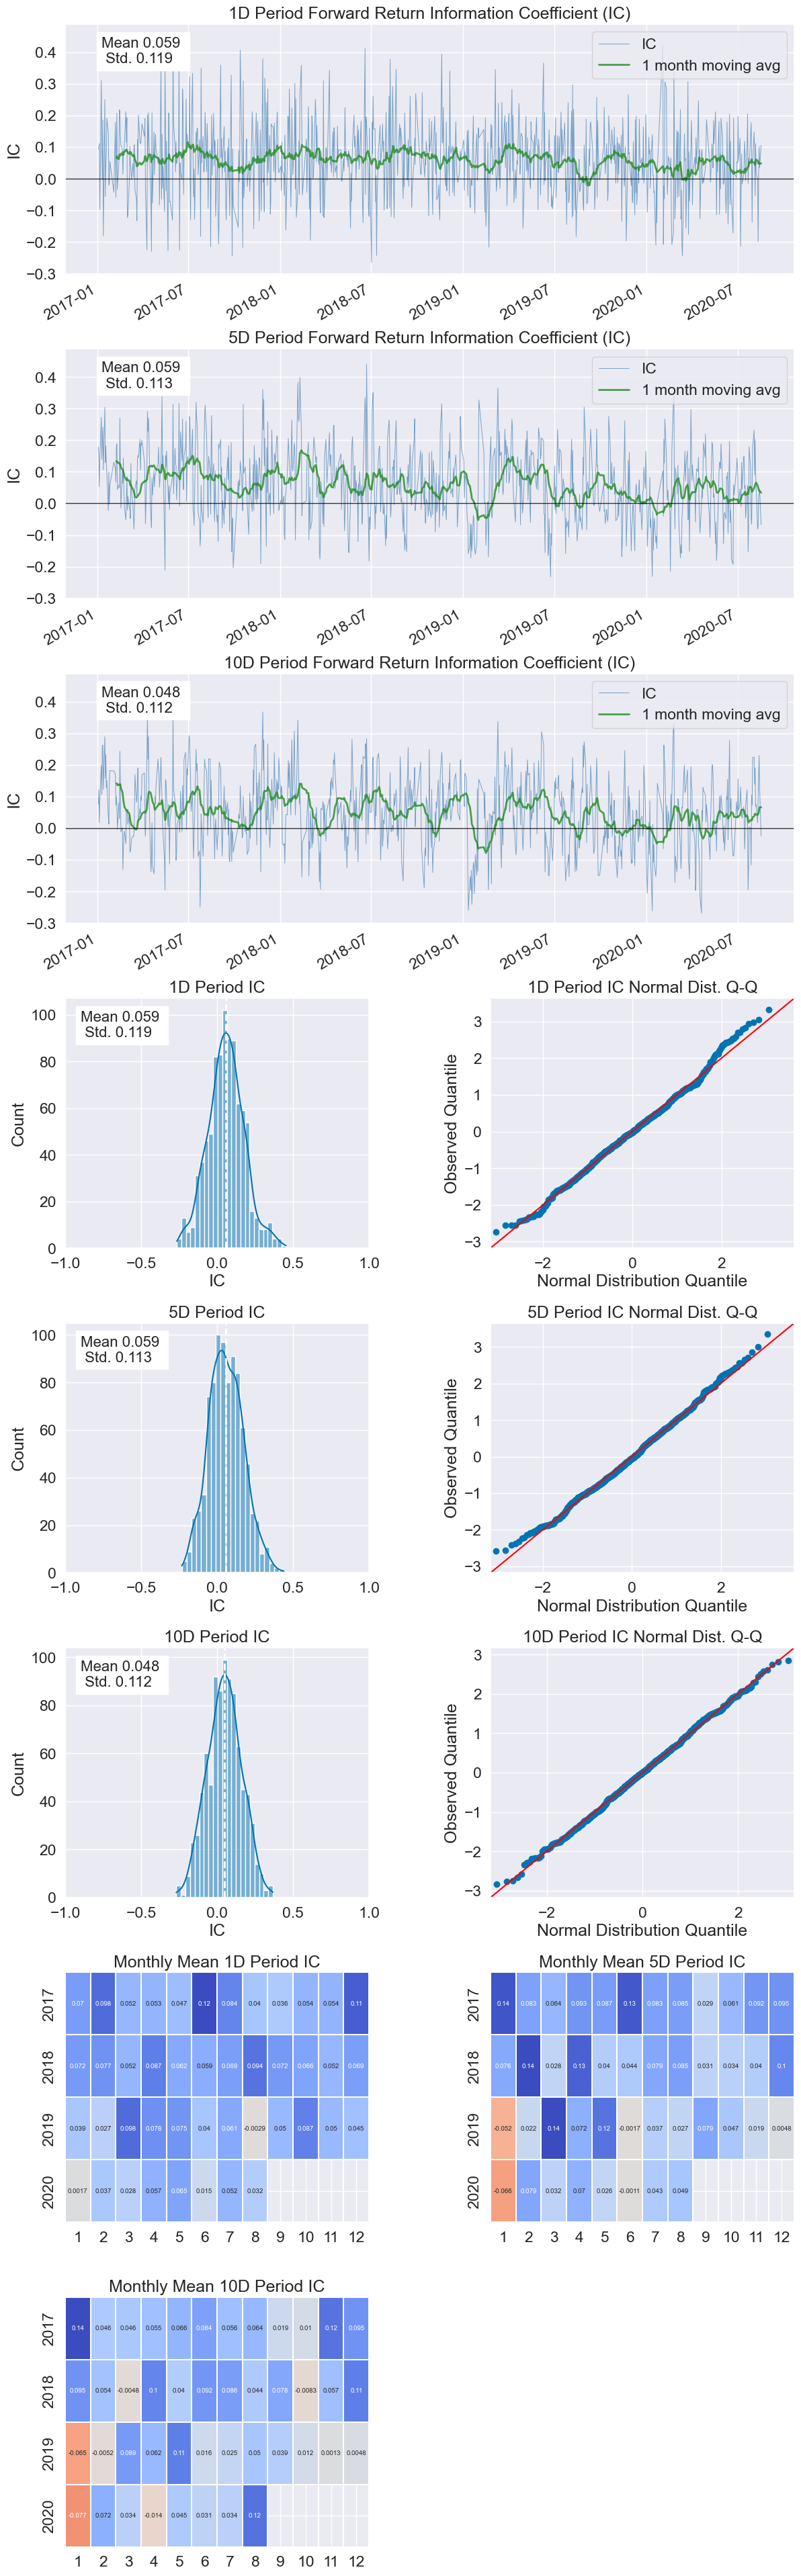

d:\veighna_studio\Lib\site-packages\alphalens\utils.py:932: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover    0.639  0.812  0.828
Quantile 2 Mean Turnover    0.807  0.871  0.874
Quantile 3 Mean Turnover    0.842  0.881  0.886
Quantile 4 Mean Turnover    0.846  0.879  0.880
Quantile 5 Mean Turnover    0.850  0.875  0.877
Quantile 6 Mean Turnover    0.850  0.876  0.878
Quantile 7 Mean Turnover    0.843  0.880  0.881
Quantile 8 Mean Turnover    0.825  0.874  0.881
Quantile 9 Mean Turnover    0.777  0.867  0.867
Quantile 10 Mean Turnover   0.588  0.784  0.804

1D     5D    10D
Mean Factor Rank Autocorrelation  0.458  0.127  0.105

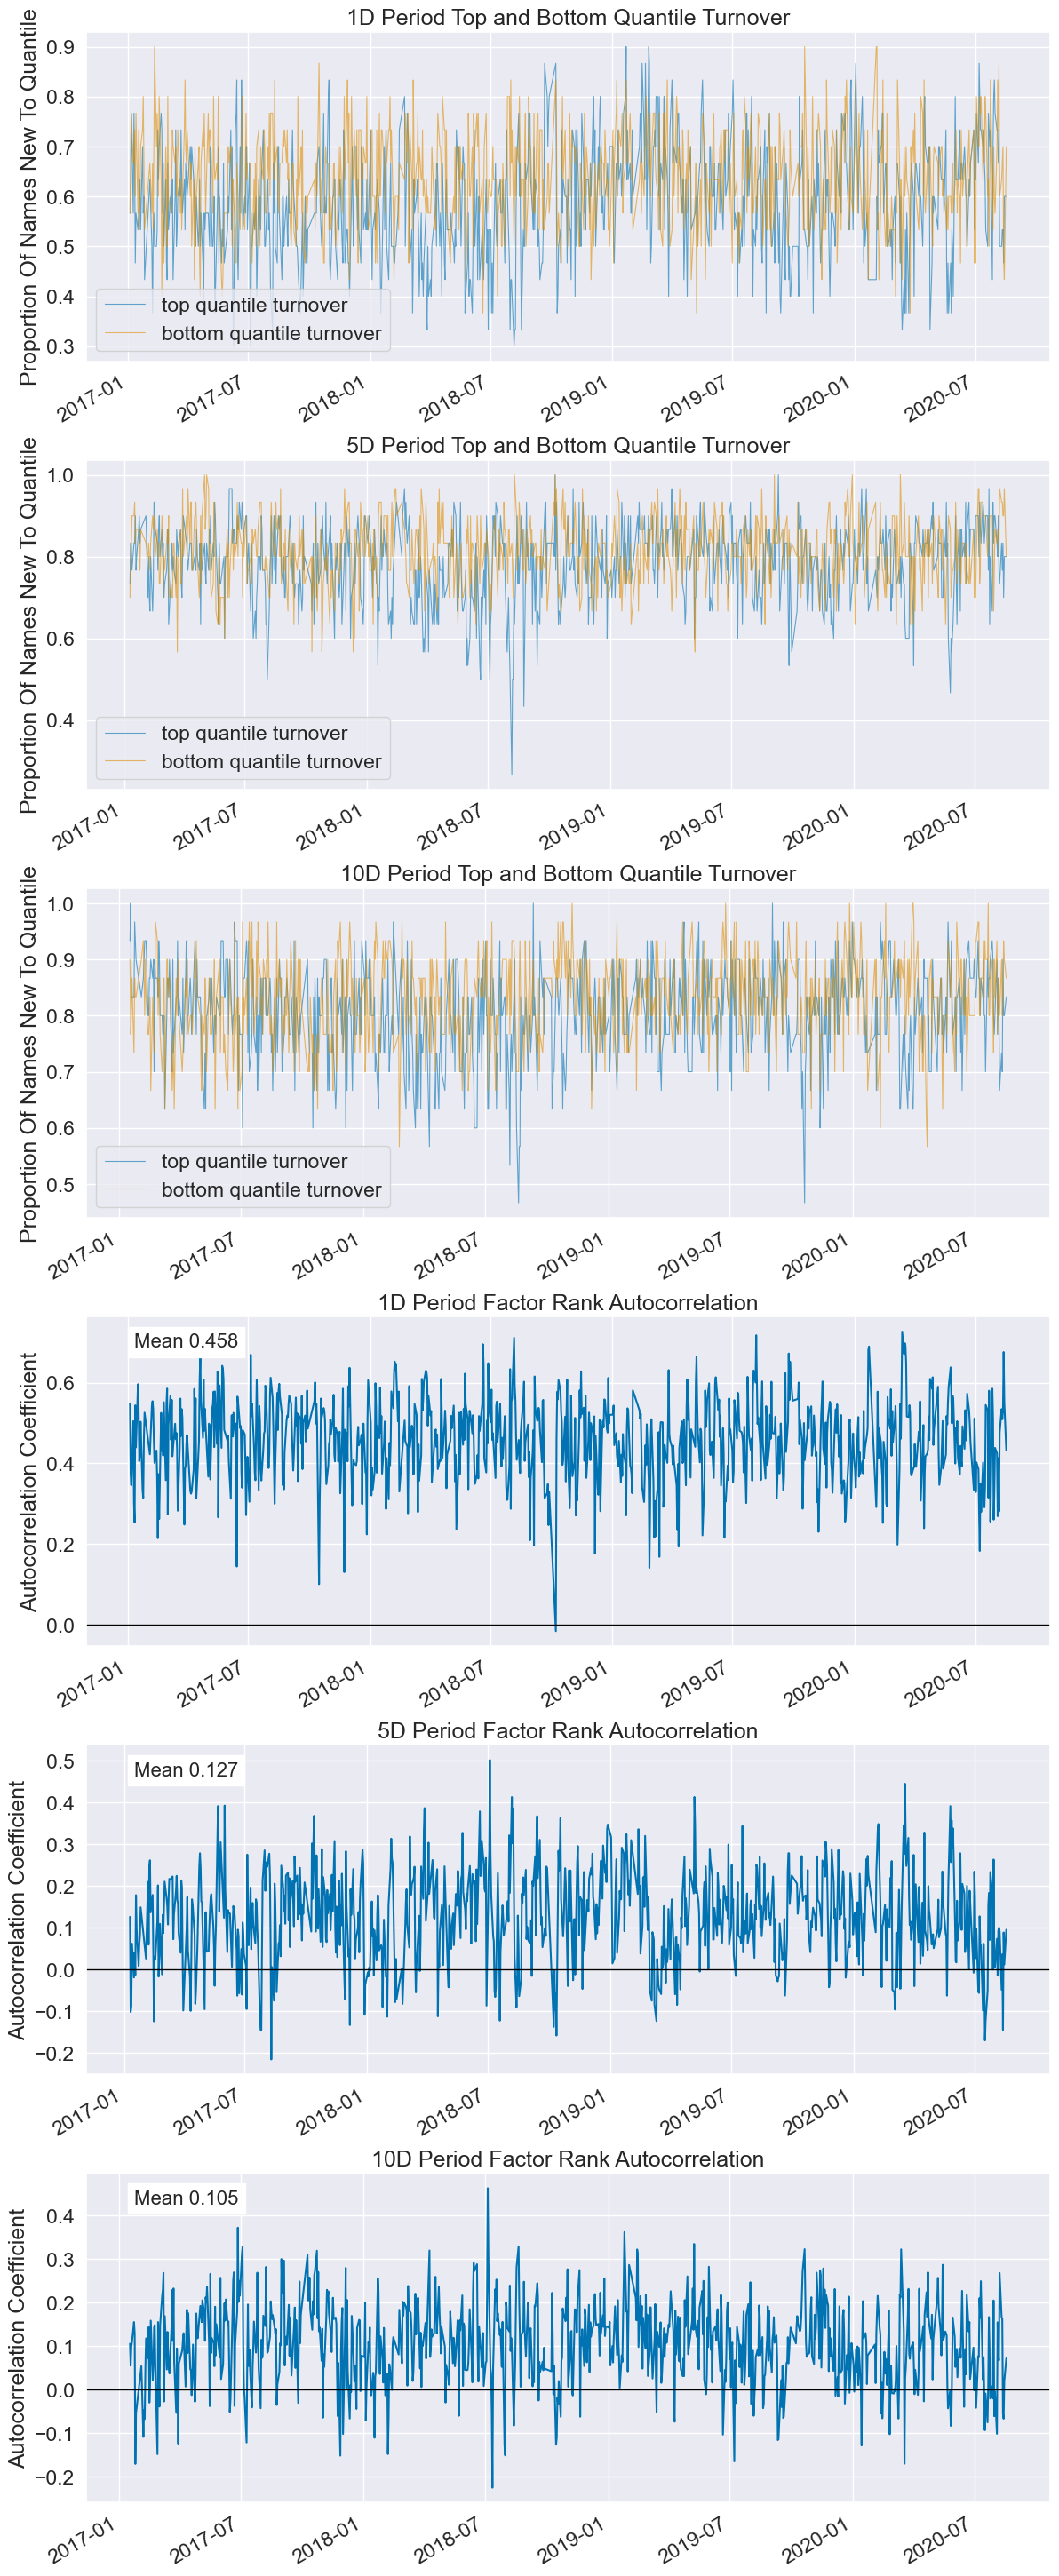

In [24]:
# 检查信号绩效
dataset.show_signal_performance(signal)

In [25]:
# 保存信号数据
lab.save_signal(name, signal)

# 策略回测

In [26]:
# 加载模块
import importlib
from datetime import datetime

from vnpy.alpha.strategy import BacktestingEngine

import vnpy.alpha.strategy.strategies.equity_demo_strategy as equity_demo_strategy

In [27]:
# 重载策略类
importlib.reload(equity_demo_strategy)
EquityDemoStrategy = equity_demo_strategy.EquityDemoStrategy

In [28]:
# 从文件加载信号数据
signal = lab.load_signal(name)

In [29]:
# 创建回测引擎对象
engine = BacktestingEngine(lab)

# 设置回测参数
engine.set_parameters(
    vt_symbols=component_symbols,
    interval=Interval.DAILY,
    start=datetime(2017, 1, 1),
    end=datetime(2020, 8, 1),
    capital=100000000
)

# 添加策略实例
setting = {"top_k": 30, "n_drop": 3, "hold_thresh": 3}
engine.add_strategy(EquityDemoStrategy, setting, signal)

In [30]:
# 执行回测任务
engine.load_data()
engine.run_backtesting()
engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

2025-12-24 13:51:45 开始加载历史数据


100%|██████████| 819/819 [00:07<00:00, 107.63it/s]

2025-12-24 13:51:53 部分合约历史数据为空：['600001.SSE', '601825.SSE', '600905.SSE', '000527.SZSE', '600631.SSE', '688271.SSE', '000024.SZSE', '300999.SZSE', '688041.SSE', '600786.SSE', '601995.SSE', '300979.SZSE', '601268.SSE', '605499.SSE', '300919.SZSE', '300896.SZSE', '600832.SSE', '688187.SSE', '605117.SSE', '301269.SZSE', '600102.SSE', '300866.SZSE', '600357.SSE', '600938.SSE', '601299.SSE', '600087.SSE', '001289.SZSE', '601868.SSE', '688065.SSE', '300957.SZSE', '688223.SSE', '000562.SZSE', '601728.SSE', '600941.SSE', '688303.SSE', '601059.SSE', '600591.SSE', '300888.SZSE']
2025-12-24 13:51:53 所有历史数据加载完成
2025-12-24 13:51:53 策略初始化完成
2025-12-24 13:51:53 开始回放历史数据


2025-12-24 13:52:00 历史数据回放结束
2025-12-24 13:52:00 开始计算逐日盯市盈亏
2025-12-24 13:52:01 逐日盯市盈亏计算完成
2025-12-24 13:52:01 开始计算策略统计指标
2025-12-24 13:52:01 ------------------------------
2025-12-24 13:52:01 首个交易日：  2017-01-03
2025-12-24 13:52:01 最后交易日：  2020-07-31
2025-12-24 13:52:01 总交易日：  871
2025-12-24 13:52:01 盈利交易日：  464
2025-12-24 13:52:01 亏损交易日：  406
2025-12-24 13:52:01 起始资金：  100,000,000.00
2025-12-24 13:52:01 结束资金：  176,048,416.44
2025-12-24 13:52:01 总收益率：  76.05%
2025-12-24 13:52:01 年化收益：  20.95%
2025-12-24 13:52:01 最大回撤:   -29,222,760.86
2025-12-24 13:52:01 百分比最大回撤: -21.19%
2025-12-24 13:52:01 最长回撤天数:   345
2025-12-24 13:52:01 总盈亏：  76,048,416.44
2025-12-24 13:52:01 总手续费：  9,278,261.41
2025-12-24 13:52:01 总成交金额：  12,401,200,805.47
2025-12-24 13:52:01 总成交笔数：  4758
2025-12-24 13:52:01 日均盈亏：  87,311.61
2025-12-24 13:52:01 日均手续费：  10,652.42
2025-12-24 13:52:01 日均成交金额：  14,237,888.41
2025-12-24 13:52:01 日均成交笔数：  5.462686567164179
2025-12-24 13:52:01 日均收益率：  0.07%
2025-12-24 13:52:01 收益标准差：  1.

In [31]:
# 显示超额收益分析结果
engine.show_performance(benchmark_symbol=index_symbol)